<a href="https://colab.research.google.com/github/PedroHeinrickg/Analises-de-dados/blob/main/Notebooks/Modelo_de_predi%C3%A7%C3%A3o_para_musicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE PARA CLASSIFICAÇÃO DE MUSICAS DO SPOTIFY

# OBJETIVO DO PROJETO
Este notebook tem como objetivo criar um **modelo de análise preditiva para classificar músicas lentas e agitadas** utilizando a base de dados "Spotify Tracks Dataset" do Kaggle.

Esta base de dados está disponível em: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

In [1]:
#Importação das bibliotecas pandas e matplotlib
import pandas as pd
import matplotlib.pyplot as plt



In [175]:
#Visualizar a tabela
pd.set_option('display.max_columns', None)

#Definição do dataset como "df" e leitura do dataset
df = pd.read_csv('dataset.csv')

#Exibir a tabela
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [157]:
#Exibição do tamanho do dataset
df.shape

(114000, 22)

# CRIANDO A VARIÁVEL TARGET
De acordo com a regra da empresa, uma medida de **0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa**. Faixas com **alta valência soam mais positivas** (por exemplo, feliz, alegre, eufórica), enquanto faixas com **baixa valência soam mais negativas** (por exemplo, triste, deprimida, irritada). Para criar um modelo preditivo, utilizei a coluna "valence" para ser nosso critério de músicas agitadas ou lentas, adotando o critério de valence >0.5 = agitada e valence < 0.5 = lenta.

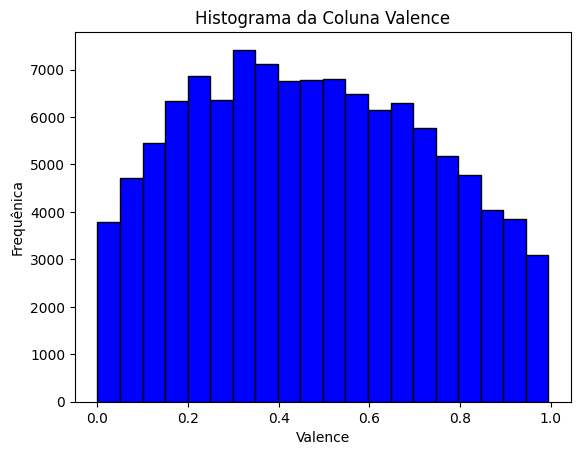

In [87]:
#Definição das caracteristicas do histograma
plt.hist(df['valence'], bins=20, color='blue', edgecolor='black')

#Definição dos eixos do histograma
plt.xlabel('Valence')
plt.ylabel('Frequênica')

#Definição de título do histograma
plt.title('Histograma da Coluna Valence')

#Exibição do histograma
plt.show()


In [ ]:
#Analise descritiva dos dados
df['valence'].describe()

In [88]:
def classificar_valence(row):
  if row['valence'] > 0.5:
    return 'Agitada'

  else:
    return 'Lenta'

#Cria a nova coluna 'target' usando a função classificar_valence
#Apply irá aplicar a função classificar valence para todas as linhas do dataset
df['target'] = df.apply(classificar_valence, axis=1)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Agitada
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Lenta
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Lenta
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Lenta
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Lenta


# Feature Engineering
Armazenar em um novo dataframe apenas as colunas necessárias para a classificação de músicas

In [15]:
#Exibir colunas do dataframe
df.columns


Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'target'],
      dtype='object')

In [28]:
#Criação do novo dataframe
df_musicas = df.drop(['Unnamed: 0', 'track_id'], axis=1)
df_musicas.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Agitada
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Lenta
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Lenta
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Lenta
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Lenta


# TRATAMENTO DOS DADOS CATEGÓRICOS
Agora irei utilizar o LabelEncoder para codificar rótulos de classes em números inteiros.

In [ ]:
#Definindo uma nova função
def label_encoder(df, columns_to_encode):
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()

  for column in columns_to_encode:
    if column in df.columns:
      df[column] = le.fit_transform(df[column])

    else:
      print('A lista possui colunas que não existem no DataFrame')

  return df

#Codificando em números inteiros os dados nominais
colunas_a_codificar = ['artists', 'album_name', 'track_name', 'explicit', 'track_genre', 'target']
label_encoder(df_musicas, colunas_a_codificar)
df_musicas.head()

# ANALISANDO AS VARIÁVEIS QUE VÃO COMPOR O MODELO

<Axes: >

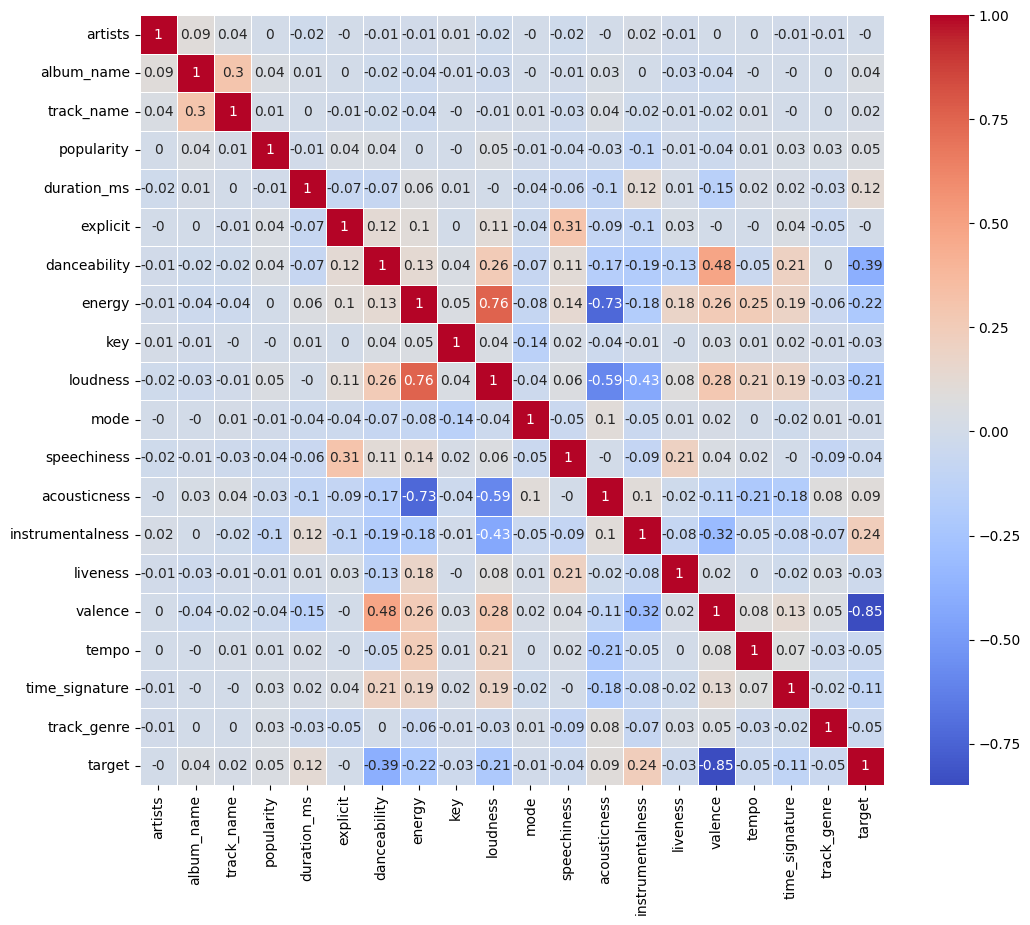

In [45]:
#Utilização da biblioteca seaborn para criação da analise de correlação com cores.
import seaborn as sns

#Criando a a função de correlação com o uso de 2 casas decimais.
correlation_matrix = df_musicas.corr().round(2)

#Criação do gráfico
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")

# VERIFICANDO O EQUILIBRIO DA TARGET

In [46]:
#Verifivando a distribuição dos dados
round(df_musicas['target'].value_counts(normalize=True)*100,2)

target
1    54.37
0    45.63
Name: proportion, dtype: float64

# SEPARANDO OS DADOS EM TREINO E TESTE

In [48]:
df_musicas.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'target'],
      dtype='object')

In [176]:
#Separando os dados em treino e teste (método hold out)
from sklearn.model_selection import train_test_split

#X = df_musicas.drop('target', axis=1)
X = df_musicas[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'track_genre']]
y = df_musicas['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)

In [55]:
print(X_train.shape, X_test.shape)

(91200, 9) (22800, 9)


# NORMALIZANDO OS DADOS
Ao aplicar a função MinMaxScaler, todos os valores dos dados serão transformados para o intervalo entre 0 e 1, onde o valor mínimo será 0 e o valor máximo será 1.

In [86]:
from sklearn.preprocessing import MinMaxScaler

# Criar uma instância do MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train) # aqui falar sobre data leak

X_train_escalonado = scaler.transform(X_train)
X_test_escalonado = scaler.transform(X_test)

# CRIAÇÃO DE FUNÇÃO PARA EXECUTAR MODELOS
A função vai executar o modelo preditivo e avaliar a sua performance utilizando as principais métricas de validação.

In [177]:
def roda_modelo(modelo):

    from sklearn.metrics import roc_curve, roc_auc_score, classification_report

    # Treinando modelo com os dados de treino
    modelo.fit(X_train_escalonado, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(X_test_escalonado) # obter as probabilidades associadas às classes previstas para cada instância de dados
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(X_test_escalonado)
    print("\nClassification Report")
    print(classification_report(y_test, predicao))

    print("\nRoc Curve\n")
    # Fazer previsões de probabilidades
    y_pred_probs = modelo.predict_proba(X_test_escalonado)[:, 1]

    # Calcular a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

    # Calcular a AUC (área sob a curva ROC)
    auc = roc_auc_score(y_test, y_pred_probs)

    # Plotar a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})') # linewidth
    plt.plot([0, 1], [0, 1], color='gray',linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Converter probabilidades em classes preditas (0 ou 1)
    y_pred = (y_pred_probs > 0.5).astype(int)

#Regressão logística
O modelo se baseia em uma função logística, que transforma as variáveis independentes em uma probabilidade entre 0 e 1. Para novas entradas de dados, o modelo calcula a probabilidade do evento binário ocorrer.

AUC 0.7962059470391694

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.69      0.69     10403
           1       0.74      0.75      0.75     12397

    accuracy                           0.72     22800
   macro avg       0.72      0.72      0.72     22800
weighted avg       0.72      0.72      0.72     22800


Roc Curve



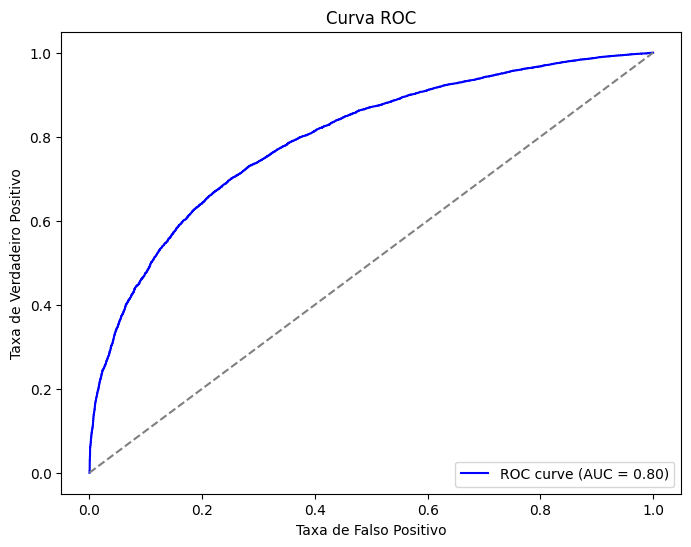

In [76]:
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()
roda_modelo(modelo_logistico)

AUC 0.8301726072883818

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.71      0.72     10403
           1       0.76      0.78      0.77     12397

    accuracy                           0.75     22800
   macro avg       0.75      0.74      0.74     22800
weighted avg       0.75      0.75      0.75     22800


Roc Curve



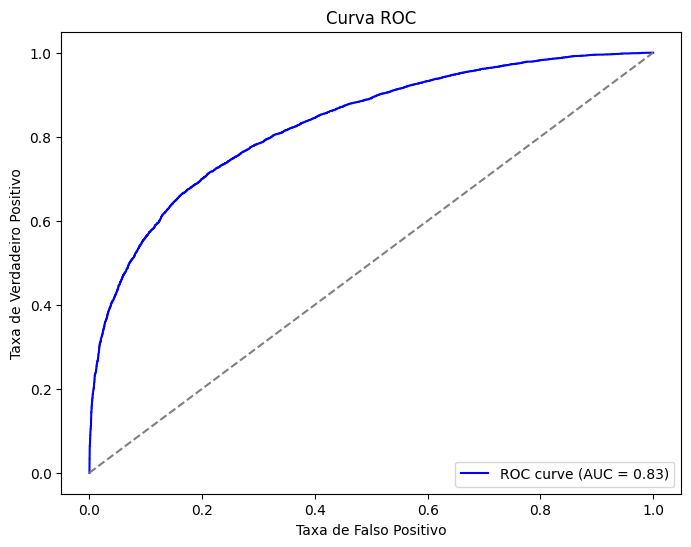

In [77]:
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest = RandomForestClassifier(max_depth=7, n_estimators= 100)
roda_modelo(modelo_random_forest)

In [80]:
from sklearn.model_selection import GridSearchCV

# Defina os parâmetros a serem testados
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15]
}

# GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=1)

# Ajuste o modelo ao conjunto de dados
grid_search.fit(X_train_escalonado, y_train)

rf_params = grid_search.best_params_
print("Melhores hiperparâmetros:", rf_params)

Melhores hiperparâmetros: {'max_depth': 15, 'n_estimators': 300}


AUC 0.9056479626477651

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     10403
           1       0.83      0.83      0.83     12397

    accuracy                           0.82     22800
   macro avg       0.82      0.82      0.82     22800
weighted avg       0.82      0.82      0.82     22800


Roc Curve



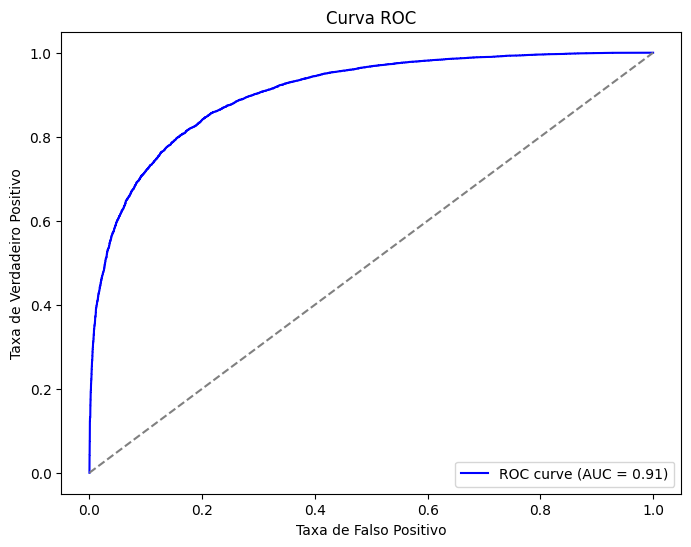

In [111]:
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest_gs = RandomForestClassifier(max_depth=15, n_estimators= 300)
roda_modelo(modelo_random_forest_gs)

# TESTANDO O MODELO

In [166]:
import numpy as np

novos_dados = pd.read_excel("novos_dados.xlsx")
base_original = pd.read_excel("novos_dados.xlsx")

#Criando a pipeline
coluna = ['track_genre']
label_encoder(novos_dados, coluna)
novos_dados = scaler.transform(novos_dados)

# Realize a previsão usando o modelo Random Forest treinado
previsoes = modelo_random_forest_gs.predict(novos_dados)

# Obtendo o predict
def mapear_valor(valores):
    resultados = []
    for valor in valores:
        if valor == 0:
            resultados.append('Música agitada')
        elif valor == 1:
            resultados.append('Música lenta')
        else:
            resultados.append('Desconhecido')
    return np.array(resultados)

base_original['target'] = mapear_valor(previsoes)
base_original.head()

,popularity,duration_ms,danceability,energy,loudness,acousticness,instrumentalness,liveness,track_genre,target
0,80,200000,0.89,0.8,-19333,0.0555,0.976,0.45,rock,Música agitada
1,30,205000,0.20,0.5,-11773,0.0100,0.452,0.20,folk,Música lenta


#APLICAÇÃO PARA A BASE DE DADOS ORIGINAL

Nesse momento irei aplicar o modelo de predição a Base de Dados original para verificar a taxa de erros do modelo comparando a variável "valence" com a variável "target". O resultado será exibido na coluna "Resultado"

In [171]:
import numpy as np

base_original = pd.read_csv("dataset.csv")
novos_dados = base_original.drop(['Unnamed: 0','album_name', 'artists', 'explicit', 'key', 'mode', 'speechiness', 'tempo', 'time_signature', 'track_id', 'track_name', 'valence'], axis = 1)

#Criando a pipeline
coluna = ['track_genre']
label_encoder(novos_dados, coluna)
novos_dados = scaler.transform(novos_dados)

# Realize a previsão usando o modelo Random Forest treinado
previsoes = modelo_random_forest_gs.predict(novos_dados)

# Obtendo o predict
def mapear_valor(valores):
    resultados = []
    for valor in valores:
        if valor == 0:
            resultados.append('Música agitada')
        elif valor == 1:
            resultados.append('Música lenta')
        else:
            resultados.append('Desconhecido')
    return np.array(resultados)

base_original['target'] = mapear_valor(previsoes)
base_original.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Música agitada
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Música lenta
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Música lenta
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Música lenta
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Música lenta


In [172]:
def verificacao(row):
    if row['valence'] > 0.5 and row['target'] == "Música agitada":
        return 'Correto'
    elif row['valence'] < 0.5 and row['target'] == "Música lenta":
        return 'Correto'
    else:
        return 'Errou'

# Aplica a função verificacao para criar a nova coluna 'target'
base_original['Resultado'] = base_original.apply(verificacao, axis=1)
base_original.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target,Resultado
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Música agitada,Correto
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Música lenta,Correto
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Música lenta,Correto
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Música lenta,Correto
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Música lenta,Correto


In [173]:
# Função para contar quantos "Errou" existem na coluna 'Resultado' e retornar a porcentagem
def calcular_porcentagem_erros(base_original):
    total_registros = len(base_original)
    quantidade_erros = base_original['Resultado'].value_counts().get('Errou', 0)
    porcentagem_erros = (quantidade_erros / total_registros) * 100
    return porcentagem_erros

# Chamada da função para calcular a porcentagem de "Errou"
porcentagem_erros = calcular_porcentagem_erros(base_original)

print("Porcentagem de 'Errou': {:.2f}%".format(porcentagem_erros))

Porcentagem de 'Errou': 9.73%


In [174]:
# Função para contar quantos "Correto" existem na coluna 'Resultado' e retornar a porcentagem
def calcular_porcentagem_acertos(base_original):
    total_registros = len(base_original)
    quantidade_acertos = base_original['Resultado'].value_counts().get('Correto', 0)
    porcentagem_acertos = (quantidade_acertos / total_registros) * 100
    return porcentagem_acertos

# Chamada da função para calcular a porcentagem de "Correto"
porcentagem_acertos = calcular_porcentagem_acertos(base_original)

print("Porcentagem de 'Correto': {:.2f}%".format(porcentagem_acertos))

Porcentagem de 'Correto': 90.27%


#CONCLUSÃO
Após analisar os dados e identificar o melhor método de análise de predição e aplica-lo, foi feito a avaliação dos dados relativos para verifcar  e comparar a taxa de erros e acertos, comparando as variáveis 'popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness' com a variável 'valence'. A taxa de sucesso é de 90.27%.
para a classificação das músicas em 'lenta' ou 'animada'